<a href="https://colab.research.google.com/github/rizaho/ml_for_financial_analysis/blob/main/101_Time_Series_Analysis_And_Forecasting_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://ceb.udemy.com/course/time-series-analysis-and-forecasting-with-python/learn/lecture/27893330#overview


# ARIMA (Auto Regressive Integrated Moving Average)


## Auto Regressive (p):
In an autoregression model, we forecast the variable of interest using linear combination of past *values of the variable*.

* This is an Auto Regressive (AR) model of order **P** (parameter #1).
* P value states how much we want to go back in time to predict the X value in time t.

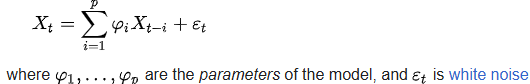

## Moving Average (q):

* It's defines the moving average model as the moving average model uses *past forecast errors*

* This is Moving Average(MA) model of order **q** (parameter #2).

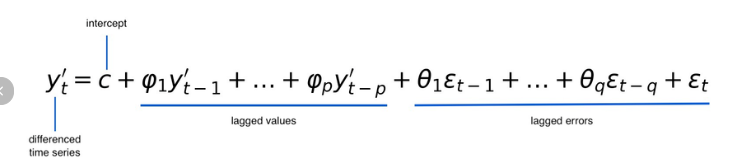

## Integrated (d):

* Order of differencing, **d** (parameter #3).
* Differencing method is actually used when we want to change the *non-stationary data to the stationary*.

* Stationary Time Series: When a time series is stationary, it means that certain attributes of the data do not change over time.

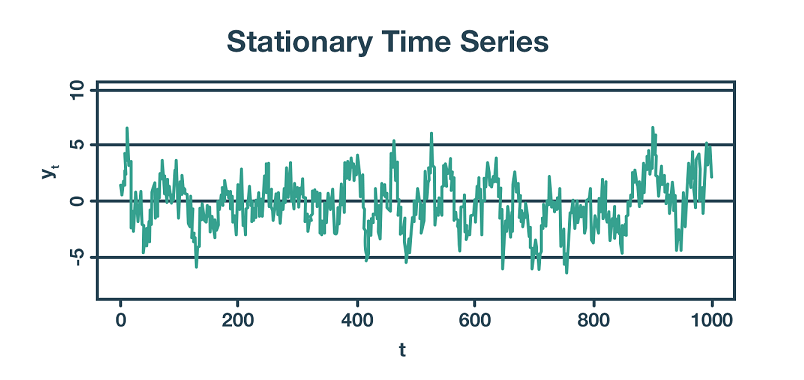

* Non-Stationary Time Series: However, some time series are non-stationary, whereby values and associations between and among variables do vary with time.
* Non-stationary behaviors can be trends, cycles, random walks, or combinations of the three.

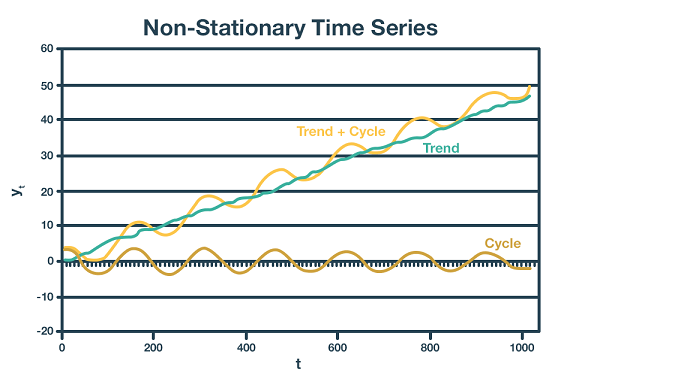

* In finance, many processes are non-stationary, and so must be handled appropriate.

* Ref: https://www.investopedia.com/articles/trading/07/stationary.asp#:~:text=When%20a%20time%20series%20is,so%20must%20be%20handled%20appropriate.

## How to find (p, d, q) parameters?

* ACF and PACF Plots (needs expertize in statistics)
* Grid Search (go with this one)
** AIC (Akaike Information Criterion)
** BIC (Bayesian Information Criterion)
** HQIC (Hannan-Quinn Information Criterion)

## Model Development (Python)

### import missing packages

In [2]:
import warnings
warnings.filterwarnings('ignore')
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.8 MB/s eta 0:00:00


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from google.colab import drive
import seaborn as sns
%matplotlib inline
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import math
from sklearn.metrics import mean_squared_error

# runtime settings
import sys
np.set_printoptions(threshold=sys.maxsize)

In [4]:
# read data from google drive
drive.mount('/content/drive')
DRIVE_DATASET_PATH = "/content/drive/My Drive/Colab Notebooks/Time Series Analysis and Forecasting with Python/"

Mounted at /content/drive


### Data preprocessing

In [5]:
df = pd.read_csv(DRIVE_DATASET_PATH +'Temp_Data.csv', index_col = "DATE", parse_dates=True)
df.index.freq = "D" # DATE, index column frequency
df.dropna(inplace=True) # remove the rows with null values
df

,Temp,relative_humidity,wind_speed,Pressure
DATE,,,,
2020-01-01,-0.44,86.0,18.5,100.15
2020-01-02,-0.09,79.0,14.0,100.47
2020-01-03,2.95,82.0,12.0,100.64
2020-01-04,-0.80,86.0,15.0,100.75
2020-01-05,-7.95,74.5,15.0,101.06
...,...,...,...,...
2021-06-03,18.55,83.5,12.0,101.14
2021-06-04,20.80,78.0,18.0,100.85
2021-06-05,22.75,71.5,13.5,100.76


<Axes: xlabel='DATE'>

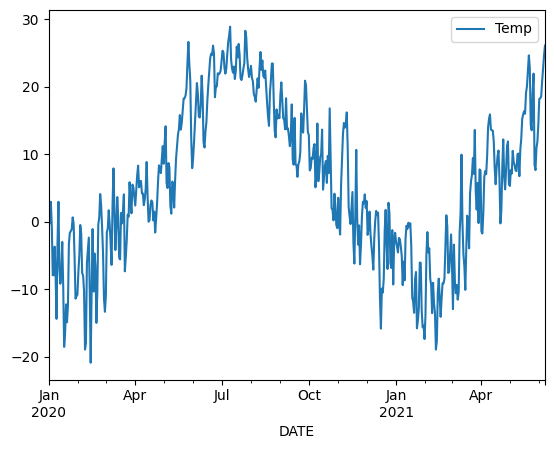

In [6]:
df = pd.DataFrame(df["Temp"])
df.plot()

### Train, test split

In [7]:
# train - test split
train = df.iloc[:510, 0] # first 510 rows and first column
test = df.iloc[510:, 0] # rows starting from 510th row and first column

### Seasonality information

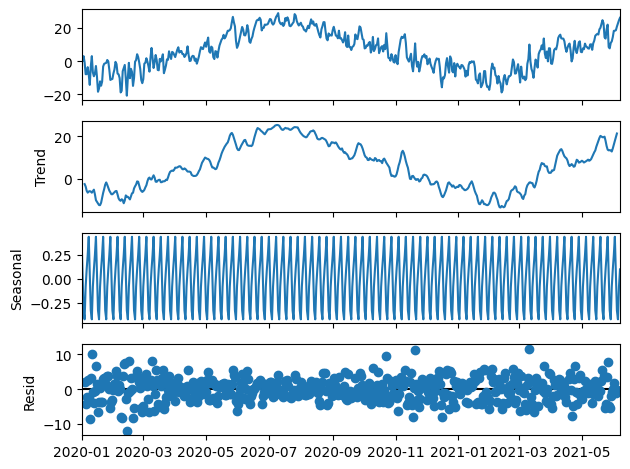

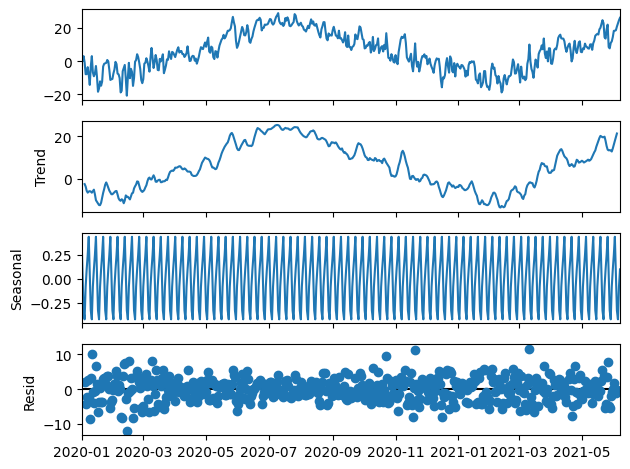

In [8]:
# for working seasonality.
# seasonality information
from statsmodels.tsa.seasonal import seasonal_decompose

Decomp_results = seasonal_decompose(df)
Decomp_results.plot()

### Finding (p, d, q) parameters with Grid Search

In [9]:

from pmdarima import auto_arima
auto_arima(df, trace=True) # default: information_criterion='aic'

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2846.718, Time=1.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2929.050, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2931.026, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2930.983, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2927.135, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2845.685, Time=0.75 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2856.303, Time=0.51 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2882.045, Time=1.54 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2846.604, Time=2.85 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2848.805, Time=0.55 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2858.051, Time=0.51 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2848.587, Time=0.95 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2844.520, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2854.723, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]          

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

### ARIMA Model Development

In [10]:
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
A_MODEL = ARIMA(train,order=(1,1,2)) # parameters(p,d,q)
predictor = A_MODEL.fit()
predictor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Temp   No. Observations:                  510
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1378.671
Date:                Tue, 11 Mar 2025   AIC                           2765.341
Time:                        13:22:29   BIC                           2782.271
Sample:                    01-01-2020   HQIC                          2771.979
                         - 05-24-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3234      0.077      4.216      0.000       0.173       0.474
ma.L1         -0.3850      0.074     -5.223      0.000      -0.529      -0.240
ma.L2         -0.4007      0.046     -8.772      0.000      -0.490      -0.311
sigma2        13.1715      0.809     16.284      0.000      11.586      14.757
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.47
Prob(Q):                              0.88   Prob(JB):                         0.29
Heteroskedasticity (H):               1.03   Skew:                            -0.14
Prob(H) (two-sided):                  0.83   Kurtosis:                         3.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
# predict the values
Predicted_results = predictor.predict(start = len(train), end = len(train) + len(test) - 1, typ='levels')

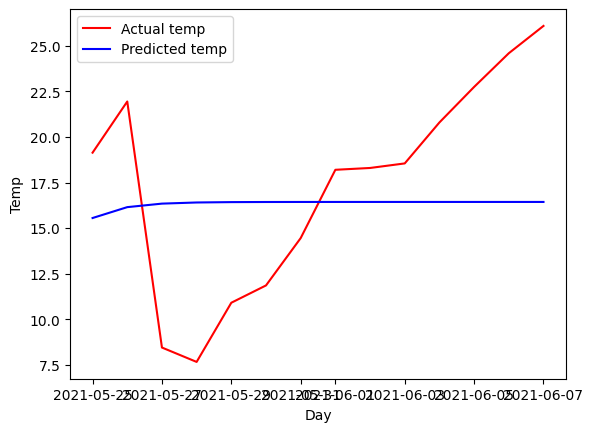

In [12]:


plt.plot(test, color = "red", label = "Actual temp")
plt.plot(Predicted_results, color = "blue", label = "Predicted temp")
plt.xlabel("Day")
plt.ylabel("Temp")
plt.legend()
plt.show()


### ARIMA Model: Prediction results

* How to interpret this result?

Graph may not be very good. But averages are similar, not bad.

In [13]:
print("Average comparison of actual and predicted values")
print("Avg. actual {}, Avg. predicted {}".format(test.mean(), Predicted_results.mean()))
print("")
print("")


rmse = math.sqrt(mean_squared_error(test, Predicted_results))
rmse

Average comparison of actual and predicted values
Avg. actual 17.40571428571429, Avg. predicted 16.341511589819948




5.801290354498276

# SARIMAX (Seasonal Auto Regressive Integrated Moving Average) !!!LATER!!!

This model takes into account exogenous variables, or in other words, use external data in our forecast.

## # SARIMAX Parameters


## non-seasonal components (p, d, q)


## seasonal components (P, D, Q, s)
s: Season length

In [14]:
# read data from file again
df = pd.read_csv(DRIVE_DATASET_PATH +'Temp_Data.csv', index_col = "DATE", parse_dates=True)
df.index.freq = "D" # DATE, index column frequency
df.dropna(inplace=True) # remove the rows with null values
df

,Temp,relative_humidity,wind_speed,Pressure
DATE,,,,
2020-01-01,-0.44,86.0,18.5,100.15
2020-01-02,-0.09,79.0,14.0,100.47
2020-01-03,2.95,82.0,12.0,100.64
2020-01-04,-0.80,86.0,15.0,100.75
2020-01-05,-7.95,74.5,15.0,101.06
...,...,...,...,...
2021-06-03,18.55,83.5,12.0,101.14
2021-06-04,20.80,78.0,18.0,100.85
2021-06-05,22.75,71.5,13.5,100.76


<Axes: >

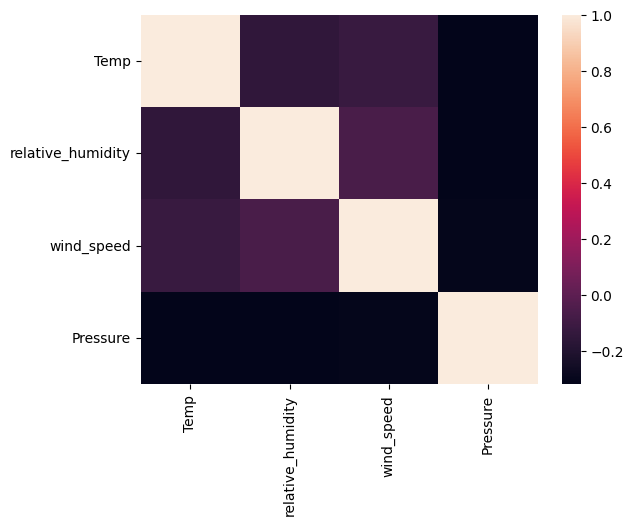

In [15]:
sns.heatmap(df.corr())

In [16]:
# train - test split
train = df.iloc[:510, 0] # first 510 rows and first column
test = df.iloc[510:, 0] # rows starting from 510th row and first column

exogenous = df.iloc[:, 1:4] # all rows, but columns vanaf 1 to 4 (4 not included)
exogenous

,relative_humidity,wind_speed,Pressure
DATE,,,
2020-01-01,86.0,18.5,100.15
2020-01-02,79.0,14.0,100.47
2020-01-03,82.0,12.0,100.64
2020-01-04,86.0,15.0,100.75
2020-01-05,74.5,15.0,101.06
...,...,...,...
2021-06-03,83.5,12.0,101.14
2021-06-04,78.0,18.0,100.85
2021-06-05,71.5,13.5,100.76


In [17]:
# train-test split for exogenous variables
exogenous_train = exogenous.iloc[:510] # up to 510th row
exogenous_test = exogenous.iloc[510:] # from 510th row to the end

#  Deep Learning - Development of Univariate LSTM Model 1 !!!LATER!!!


part 41

# read data

In [36]:
df = pd.read_csv(DRIVE_DATASET_PATH +'Solar+Data+Set.csv')
df.dropna(inplace=True) # remove rows with null values
df.head(50)

,Date,Solar Ir
0,1/1/2019 0:00,0.000000
1,1/1/2019 1:00,0.000000
2,1/1/2019 2:00,0.000000
3,1/1/2019 3:00,0.000000
4,1/1/2019 4:00,0.000000
5,1/1/2019 5:00,0.000000
6,1/1/2019 6:00,0.000000
7,1/1/2019 7:00,0.000000
8,1/1/2019 8:00,0.016447
9,1/1/2019 9:00,0.093861


# train test split

In [20]:
training_set = df.iloc[:8712, 1:2].values # from 0 to 8711 rows, second column data
test_set = df.iloc[:8712, 1:2].values # from 8712 to end rows, second column data

# data scaling

In [29]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

# prepare look back window/period

In [44]:
# for self-test, this block is not used
x_train_0 = []
y_train_0 = []
WS = 24 # [W]indow [S]ize

for i in range(WS, len(training_set)):
  x_train_0.append(training_set[i-WS:i, 0:1])
  y_train_0.append(training_set[i, 0])

#x_train_0, y_train_0 = np.array(x_train_0), np.array(y_train_0)

#x_train_0

#column_values = ['a']
#index_values = ['first']

#df_x_train_0 = pd.DataFrame(data = x_train_0, index = index_values, columns = column_values)

#df_x_train_0


In [45]:
X_train = []
y_train = []
WS = 24 # [W]indow [S]ize

for i in range(WS, len(training_set_scaled)):
  X_train.append(training_set_scaled[i-WS:i, 0:1])
  y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)



# model creation

#  Deep Learning - Development of Multivariate LSTM Model 1

part 47